# Let's build a graph

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import itertools
import torch
import pandas as pd
from more_itertools import locate
from torch_geometric.utils import to_dense_adj

In [8]:
def concat_lists(lists):
        return list(itertools.chain.from_iterable(lists))

def pd_to_adj_matrix(df:pd.DataFrame, columns:list, weights:list):
    adj, edgeWeights = np.zeros([2,0]), []
    for i, column in enumerate(columns):
        edgeDest = [list(locate(df[column], lambda x: x==i)) for i in df[column]]
        edgeOrig = concat_lists([list(np.ones(len(x)).astype(int)*i) for i, x in enumerate(edgeDest)])
        edgeDest = concat_lists(edgeDest)
        nonSelf = np.where([val!=edgeDest[i] for i, val in enumerate(edgeOrig)])[0]
        adj = np.concatenate((adj,np.array([np.take(edgeOrig,nonSelf), np.take(edgeDest,nonSelf)])),axis=-1)
        edgeWeights = edgeWeights + [weights[i]]*len(edgeDest)
    return adj.astype(int), edgeWeights

class ProcessDataset(object):
    def __init__(self):
        file = "C:/Users\lukec\OneDrive - University of Cambridge\PhD\Data\EcoInvent/EcoInvent_B0729\process_co2e/GWP100a_IPCC2013.csv"
        self.df = pd.read_csv(file,index_col=0).reset_index(drop=True)[:20]
        self.columns = ['name','location']
        self.weights = [1,0.1]
        self.adjMatrix, self.edgeWeights = pd_to_adj_matrix(self.df,self.columns,self.weights)
        self.nodeTypes = pd.factorize(self.df.name)[0]

In [9]:
def draw_graph(nodes,edges,edgeWeights,nodeType):
    graph = nx.Graph()
    edges = zip(edges[0], edges[1], edgeWeights)
    graph.add_weighted_edges_from(edges)
    graph.add_nodes_from(nodes)
    pos = nx.kamada_kawai_layout(graph)
    fig, ax = plt.subplots(1,1,figsize=[15,15])
    nx.draw_networkx(graph,pos, with_labels=False,node_size=50,width=1, node_color=nodeType)

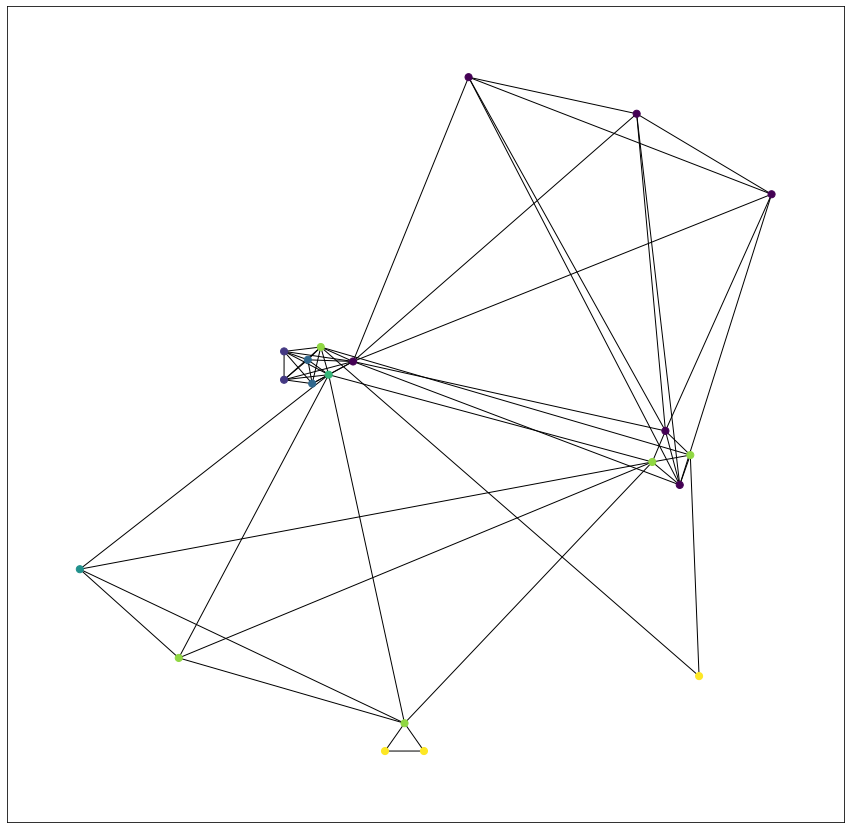

In [10]:
data = ProcessDataset()
draw_graph(data.df.index,data.adjMatrix,data.edgeWeights,data.nodeTypes)